#합성곱 신경망

필터를 이용해서 크기를 줄이고 필요한 요소만 추출하자!

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
keras.layers.Conv2D(10, kernel_size=(3,3), activation='relu')
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [2]:
#합성곱 층 넣어주기, 첫번째 (28, 28, 1) -> (14, 14, 32)
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2))
#합성곱 층 넣어주기, 2번째 (14, 14, 32) -> (7, 7, 64)
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

#평탄화
model.add(keras.layers.Flatten())
#은닉층
model.add(keras.layers.Dense(100, activation='relu'))
#드롭 아웃
model.add(keras.layers.Dropout(0.4))
#출력층
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

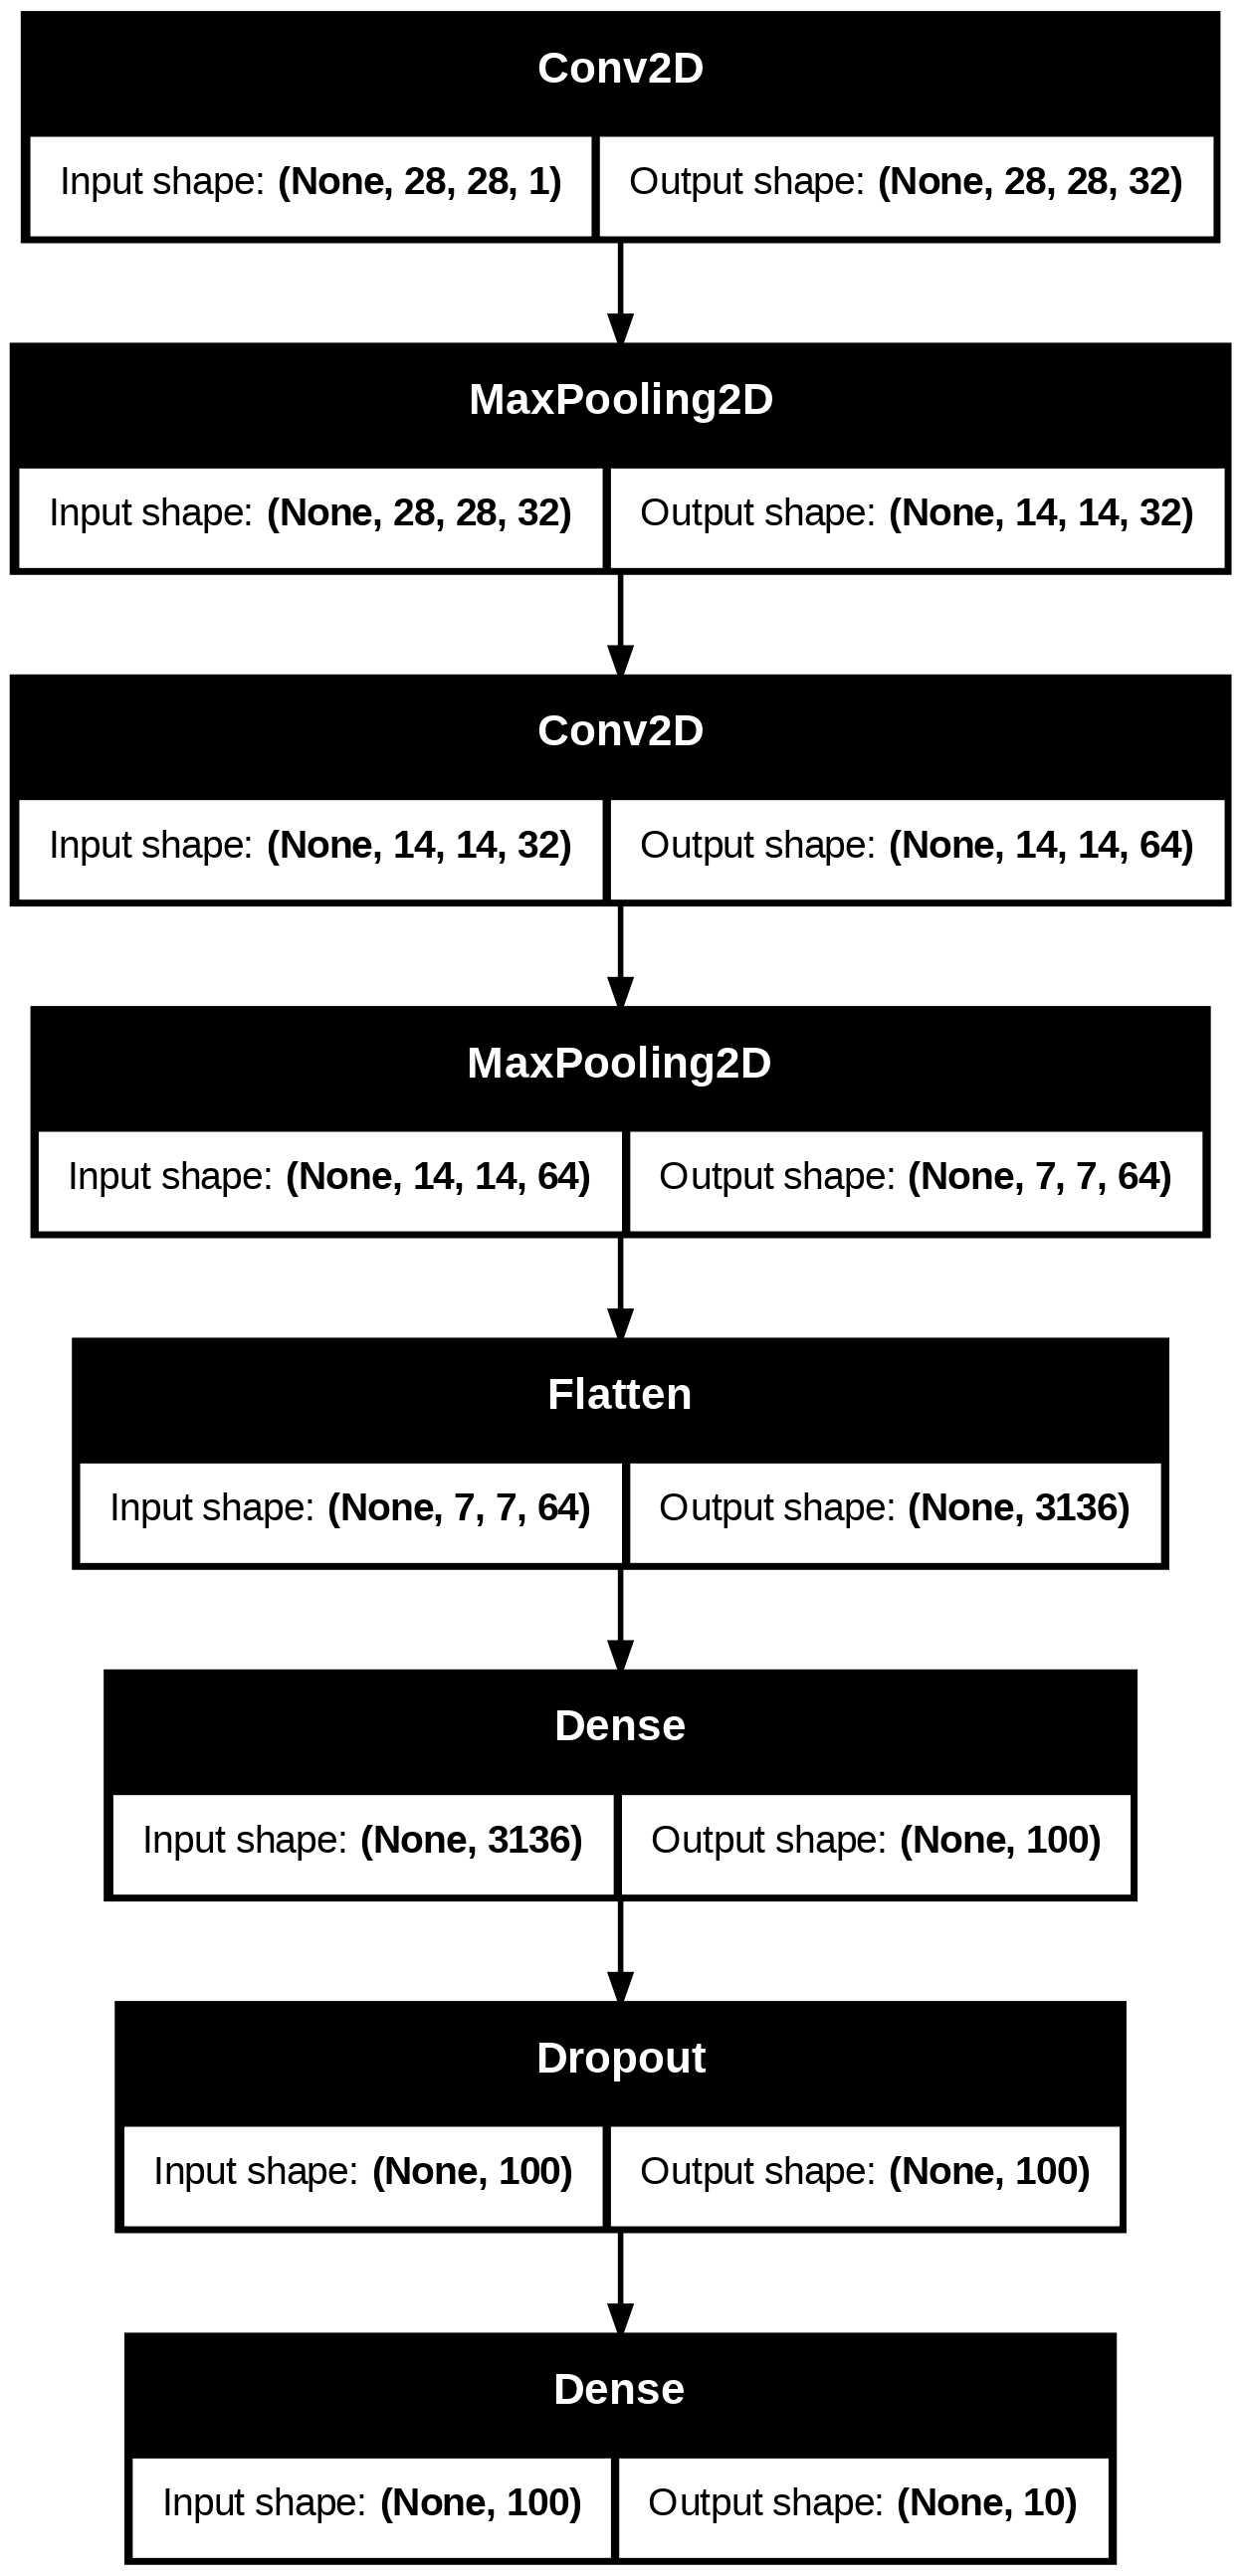

In [3]:
keras.utils.plot_model(model, show_shapes=True)

In [4]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 76s 50ms/step - accuracy: 0.7447 - loss: 0.7084 - val_accuracy: 0.8783 - val_loss: 0.3276
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 50ms/step - accuracy: 0.8735 - loss: 0.3525 - val_accuracy: 0.8968 - val_loss: 0.2723
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 87s 53ms/step - accuracy: 0.8918 - loss: 0.2948 - val_accuracy: 0.9059 - val_loss: 0.2531
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 70s 47ms/step - accuracy: 0.9061 - loss: 0.2629 - val_accuracy: 0.9087 - val_loss: 0.2420
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 57s 38ms/step - accuracy: 0.9157 - loss: 0.2347 - val_accuracy: 0.9172 - val_loss: 0.2229
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 40ms/step - accuracy: 0.9205 - loss: 0.2159 - val_accuracy: 0.9108 - val_loss: 0.2335
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 38ms/step - accuracy: 0.9253 - loss: 0.2024 - val_accuracy: 0.9176 - val_loss: 0.2218
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 39ms/step - accuracy: 0.9323 -

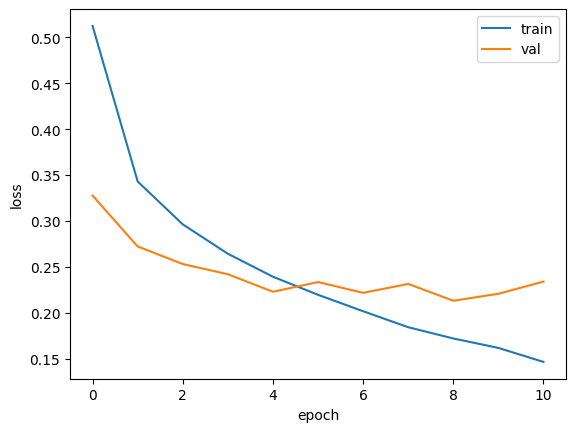

In [5]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [6]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9262 - loss: 0.2028


[0.21318750083446503, 0.9229166507720947]

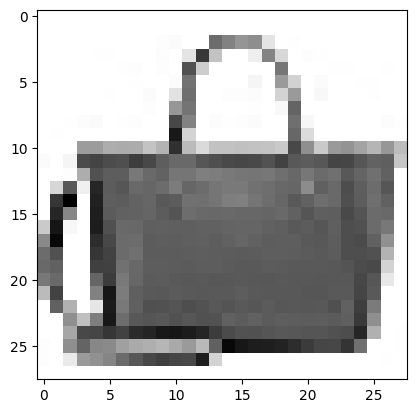

In [9]:
plt.imshow(val_scaled[0].reshape(28,28), cmap=('gray_r'))
plt.show()

In [10]:
preds = model.predict(val_scaled[0:1])
print(preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
[[2.5473782e-18 1.2747733e-28 1.5485140e-19 3.0958086e-18 7.1793851e-16
  7.4208515e-18 3.8595243e-15 4.7033855e-15 1.0000000e+00 3.0246912e-20]]


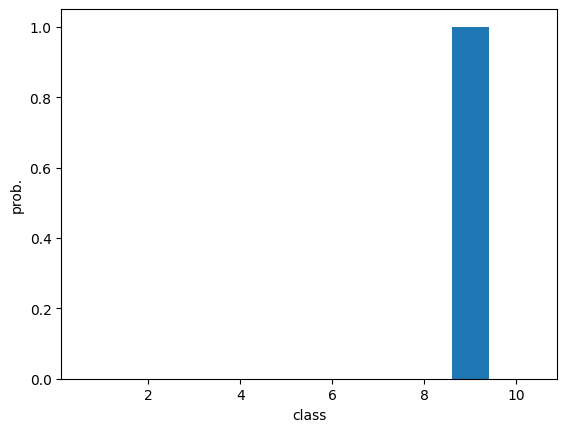

In [11]:
plt.bar(range(1,11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

#합성곱 신경망의 시각화

In [12]:
model.layers

[<Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_2, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [14]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [15]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.02359173 0.25566512


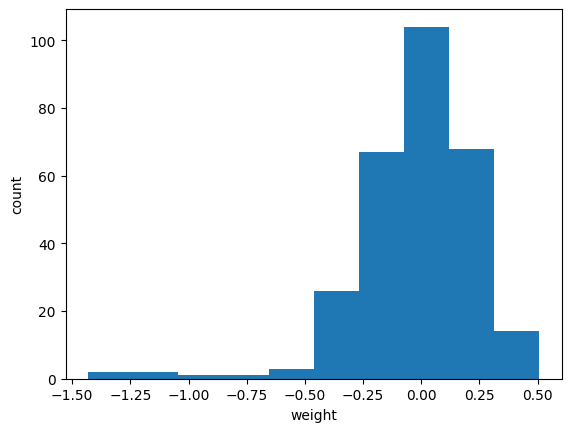

In [20]:
plt.hist(conv_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

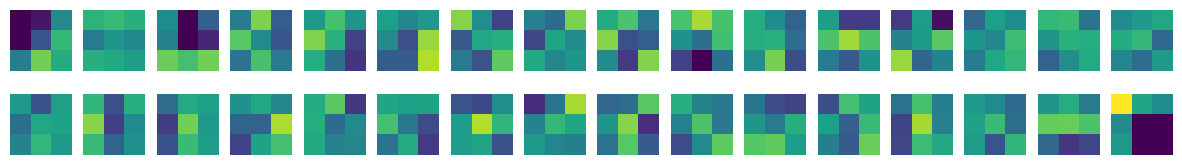

In [22]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5,vmax=0.5)
    axs[i,j].axis('off')
plt.show()

In [24]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.0020317626 0.08401625


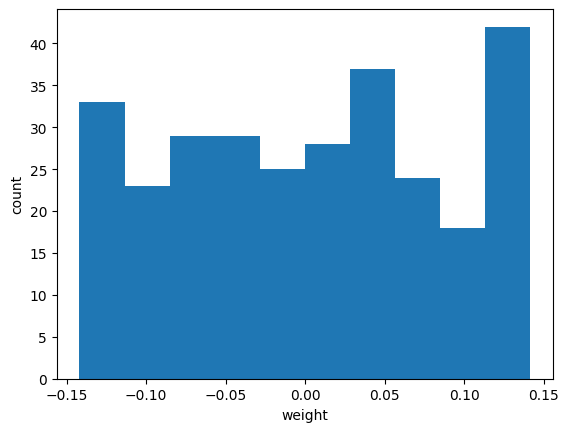

In [26]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

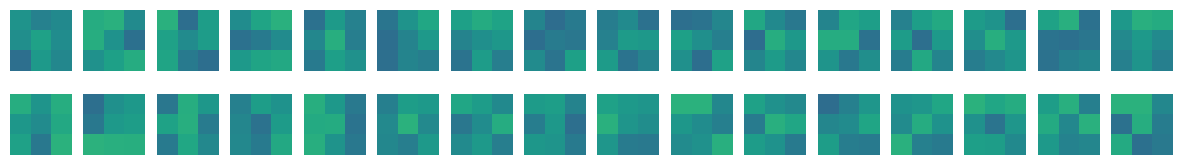

In [27]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))
for i in range(2):
  for j in range(16):
    axs[i,j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5,vmax=0.5)
    axs[i,j].axis('off')
plt.show()

##함수형 api

In [38]:
dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')

In [39]:
inputs = keras.Input((784,))
hidden = dense1(inputs)
outputs = dense2(hidden)

In [45]:
model = keras.models.load_model('best-cnn-model.keras')

In [47]:
print(model.layers[0].input)

<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer>


In [48]:
conv_acti = keras.Model(model.layers[0].input, model.layers[0].output)

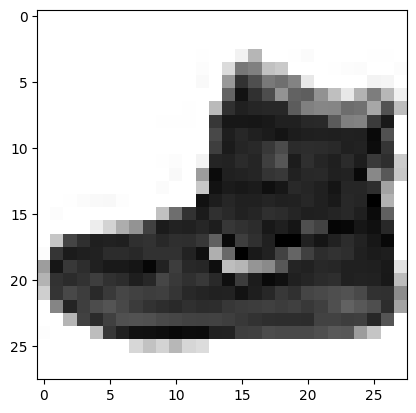

In [51]:
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [52]:
inputs = train_input[0:1].reshape(-1,28,28,1) / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [53]:
print(feature_maps.shape)

(1, 28, 28, 32)


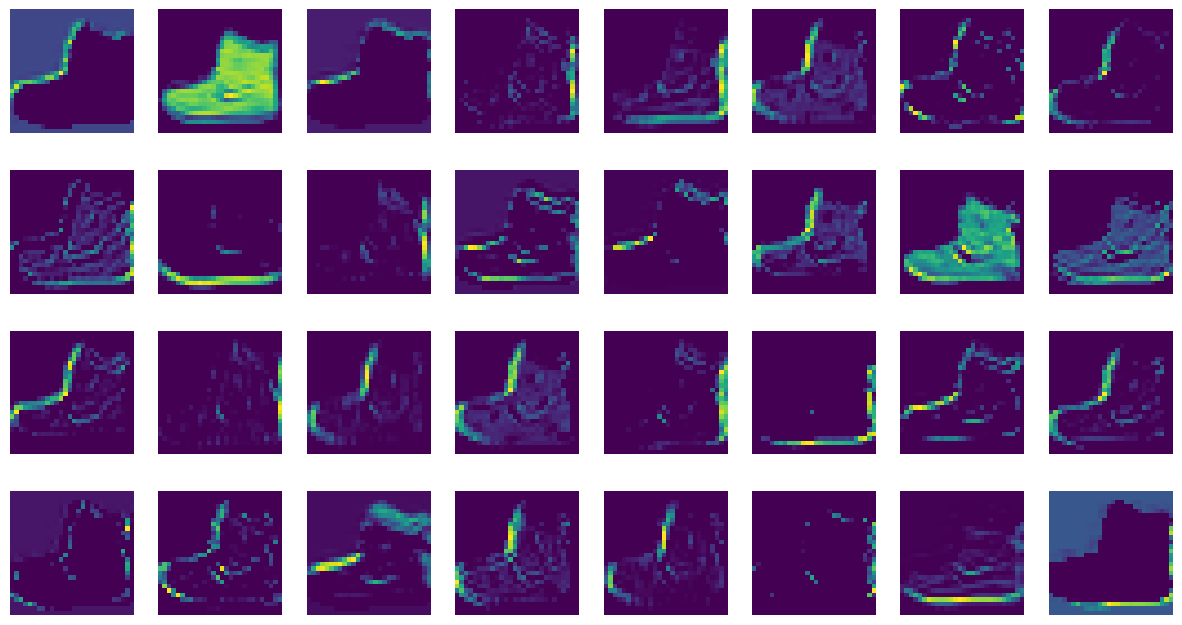

In [57]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))
for i in range(4):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i,j].axis('off')
plt.show()

In [58]:
conv2_acti = keras.Model(model.layers[0].input, model.layers[2].output)

In [59]:
feature_maps = conv2_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


In [60]:
print(feature_maps.shape)

(1, 14, 14, 64)


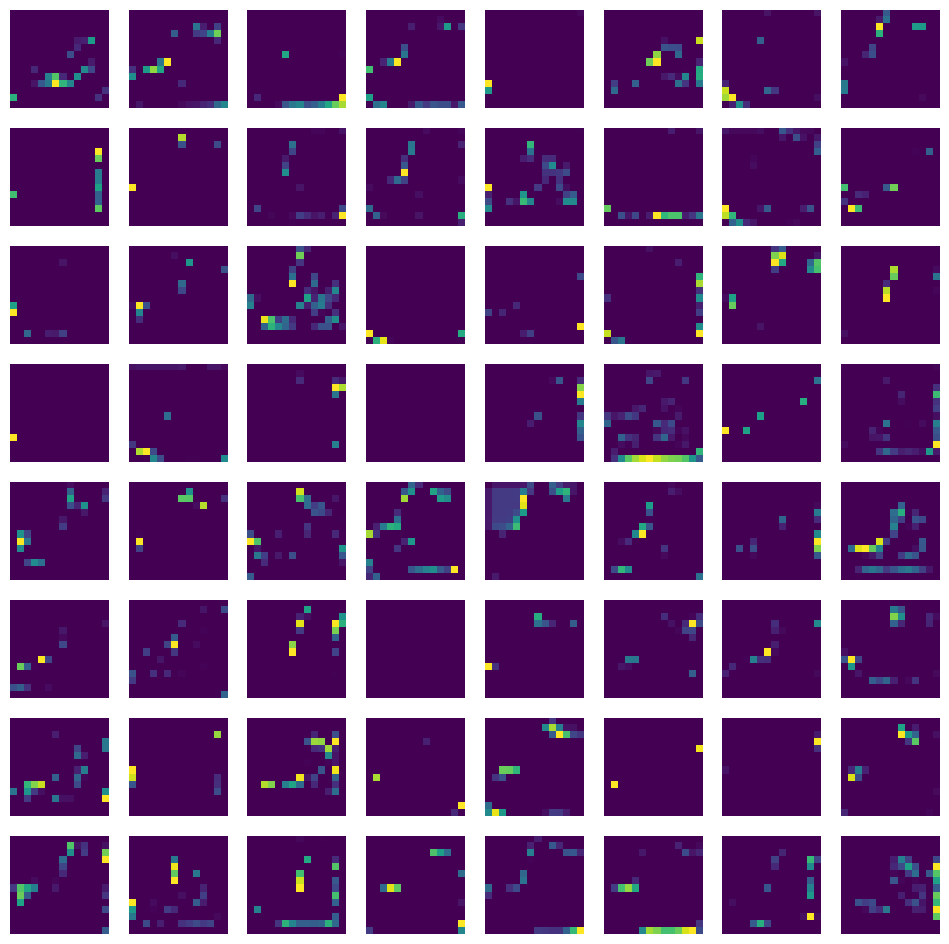

In [61]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))
for i in range(8):
  for j in range(8):
    axs[i,j].imshow(feature_maps[0,:,:,i*8 + j])
    axs[i,j].axis('off')
plt.show()